In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49610.000000,49610.000000,49610.000000,49610.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000
mean,28803.556239,-0.242569,0.012235,0.693009,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,-0.056611,0.370795,-0.344280,0.163091,0.168182,0.121488,-0.014642,0.116151,-0.094888,-0.028016,0.047379,-0.028396,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983
std,13097.468525,1.885867,1.630704,1.510559,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,1.145490,1.121682,1.339891,1.120223,1.128656,0.950374,0.953344,1.114627,0.874064,0.820387,0.725997,0.736050,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21734.250000,-0.992845,-0.562967,0.217605,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,-0.532756,-0.440313,-0.956230,-0.585946,-0.296774,-0.438531,-0.499082,-0.358917,-0.570672,-0.523949,-0.165569,-0.231664,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000
50%,33390.000000,-0.247223,0.079282,0.797007,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,-0.112556,0.332061,-0.030818,0.107226,0.149295,0.236409,0.054590,0.066106,-0.077669,-0.031908,-0.022717,-0.068396,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000
75%,38852.750000,1.155638,0.732318,1.431013,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,0.411827,1.167244,0.538411,0.876799,0.672175,0.799652,0.549965,0.540445,0.402244,0.479752,0.171717,0.108082,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000
max,44135.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,5.228342,26.237391,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [12]:
df.isna().sum()/len(df)

Time      0.00000
V1        0.00000
V2        0.00000
V3        0.00000
V4        0.00002
V5        0.00002
V6        0.00002
V7        0.00002
V8        0.00002
V9        0.00002
V10       0.00002
V11       0.00002
V12       0.00002
V13       0.00002
V14       0.00002
V15       0.00002
V16       0.00002
V17       0.00002
V18       0.00002
V19       0.00002
V20       0.00002
V21       0.00002
V22       0.00002
V23       0.00002
V24       0.00002
V25       0.00002
V26       0.00002
V27       0.00002
V28       0.00002
Amount    0.00002
Class     0.00002
dtype: float64

In [13]:
df = df.fillna(df.mean())

In [14]:
df.isna().sum()/len(df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


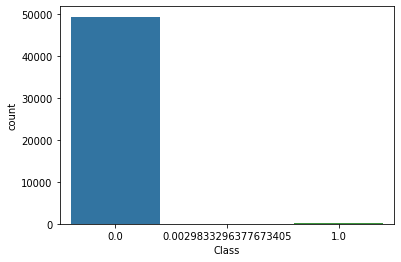

In [15]:
sns.countplot(df['Class'])

In [16]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [17]:
print(fraud.shape,normal.shape)

(148, 31) (49461, 31)


In [18]:
fraud.Amount.describe()

count     148.000000
mean      100.170676
std       233.347471
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()

count    49461.000000
mean        93.099593
std        253.325102
min          0.000000
25%          7.680000
50%         25.000000
75%         85.000000
max      12910.930000
Name: Amount, dtype: float64

Text(0.5, 0, 'Fraud')

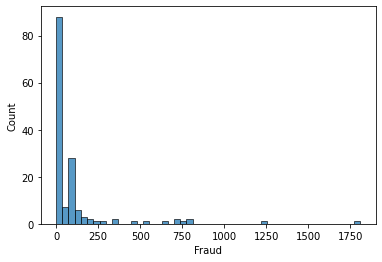

In [22]:
sns.histplot(fraud.Amount)
plt.xlabel('Fraud')

Text(0.5, 0, 'Normal')

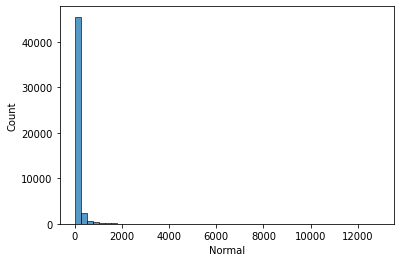

In [24]:
sns.histplot(normal.Amount, bins=50)
plt.xlabel('Normal')

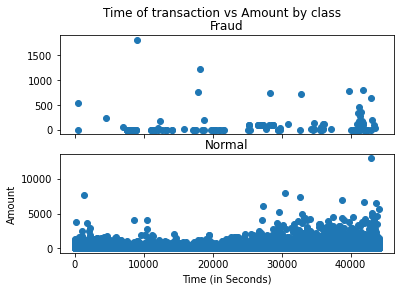

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [27]:
outlier_fraction = len(fraud)/float(len(normal))

In [28]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud)))

print("normal Cases : {}".format(len(normal)))

0.0029922565253431995
Fraud Cases : 148
normal Cases : 49461


In [60]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [61]:
from sklearn.model_selection import train_test_split 
train_X,test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=101)

Model Creation

In [32]:
from sklearn.ensemble import IsolationForest

In [63]:
cls = IsolationForest(n_estimators=100)

In [65]:
cls.fit(train_X,train_y)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred = cls.predict(test_X)

Model Performance Evaluation

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [72]:
print(confusion_matrix(test_y,y_pred))

[[14265   576]
 [    7    35]]


In [73]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     14841
         1.0       0.06      0.83      0.11        42

    accuracy                           0.96     14883
   macro avg       0.53      0.90      0.54     14883
weighted avg       1.00      0.96      0.98     14883

